In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [260]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [261]:
# 데이터 불러오기
worker = pd.read_excel('./data/전직종_연도별_근로자수.xlsx')
worker

,한국표준직업분류6차,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,7377241,7698676,8067180,8569535,8683949,9227229,9643688,10221341,10353783,10510220,10846459,11061775,11215215
1,관리자(1),151921,158068,144229,125189,174214,187604,168928,154903,157284,134314,121887,107141,98460
2,전문가 및 관련 종사자(2),1926005,2059853,1996919,2194188,2198012,2395666,2505970,2708528,2685896,2794873,2931512,2977032,3073347
3,사무 종사자(3),2036609,2131350,2130070,2263478,2335870,2507705,2637204,2812925,2900568,2991450,3095170,3193815,3214230
4,서비스 종사자(4),192217,207495,317881,380751,362592,410083,466281,506965,527626,533283,588451,646922,689756
5,판매 종사자(5),422399,463531,536379,560490,529769,554484,598207,639769,630791,664783,674223,651872,637224
6,농림어업 숙련 종사자(6),12601,12930,14784,14468,14996,20354,21458,19985,16734,16473,18395,21959,20067
7,기능원 및 관련 기능 종사자(7),568562,553640,620686,662797,657487,690334,711721,710310,726753,685561,670844,664638,714517
8,"장치,기계조작 및 조립종사자(8)",1533254,1544619,1615416,1716848,1758128,1682734,1726432,1797204,1797780,1787236,1828998,1781788,1775574
9,단순노무 종사자(9),533672,567189,690816,651326,652881,778264,807488,870752,910351,902247,916979,1016610,992040


In [262]:
# 데이터 정제(불필요 문자열 제거)
worker['한국표준직업분류6차'] = worker['한국표준직업분류6차'].str.split('(',expand=True)[0]

In [263]:
# 데이터 정제(행,열 변환 및 인덱스 재정의)
worker = worker.T
worker = worker.reset_index()

In [264]:
# 데이터 정제(컬럼명 재정의 및 필요 행 추출)
worker.columns = worker.iloc[0]
worker = worker.iloc[2:].reset_index(drop=True)

In [265]:
# 데이터 정제(컬럼명 변경)
worker = worker.rename(columns={'한국표준직업분류6차' : '연도'})

In [266]:
# 데이터 전처리(결측치, 이상치 확인)
worker.info()
worker.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   연도               12 non-null     object
 1   전직종              12 non-null     object
 2   관리자              12 non-null     object
 3   전문가 및 관련 종사자     12 non-null     object
 4   사무 종사자           12 non-null     object
 5   서비스 종사자          12 non-null     object
 6   판매 종사자           12 non-null     object
 7   농림어업 숙련 종사자      12 non-null     object
 8   기능원 및 관련 기능 종사자  12 non-null     object
 9   장치,기계조작 및 조립종사자  12 non-null     object
 10  단순노무 종사자         12 non-null     object
dtypes: object(11)
memory usage: 1.2+ KB


,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
count,12,12,12,12,12,12,12,12,12,12,12
unique,12,12,12,12,12,12,12,12,12,12,12
top,2010,7698676,158068,2059853,2131350,207495,463531,12930,553640,1544619,567189
freq,1,1,1,1,1,1,1,1,1,1,1


In [267]:
# 데이터 전처리(중복치 확인)
worker[worker.duplicated()]

,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자


In [98]:
# 데이터 정제(필요컬럼 추출)
worker_ser = worker[['연도','서비스 종사자']]

In [270]:
# 최종 데이터 확인
worker_ser

,연도,서비스 종사자
0,2010,207495
1,2011,317881
2,2012,380751
3,2013,362592
4,2014,410083
5,2015,466281
6,2016,506965
7,2017,527626
8,2018,533283
9,2019,588451


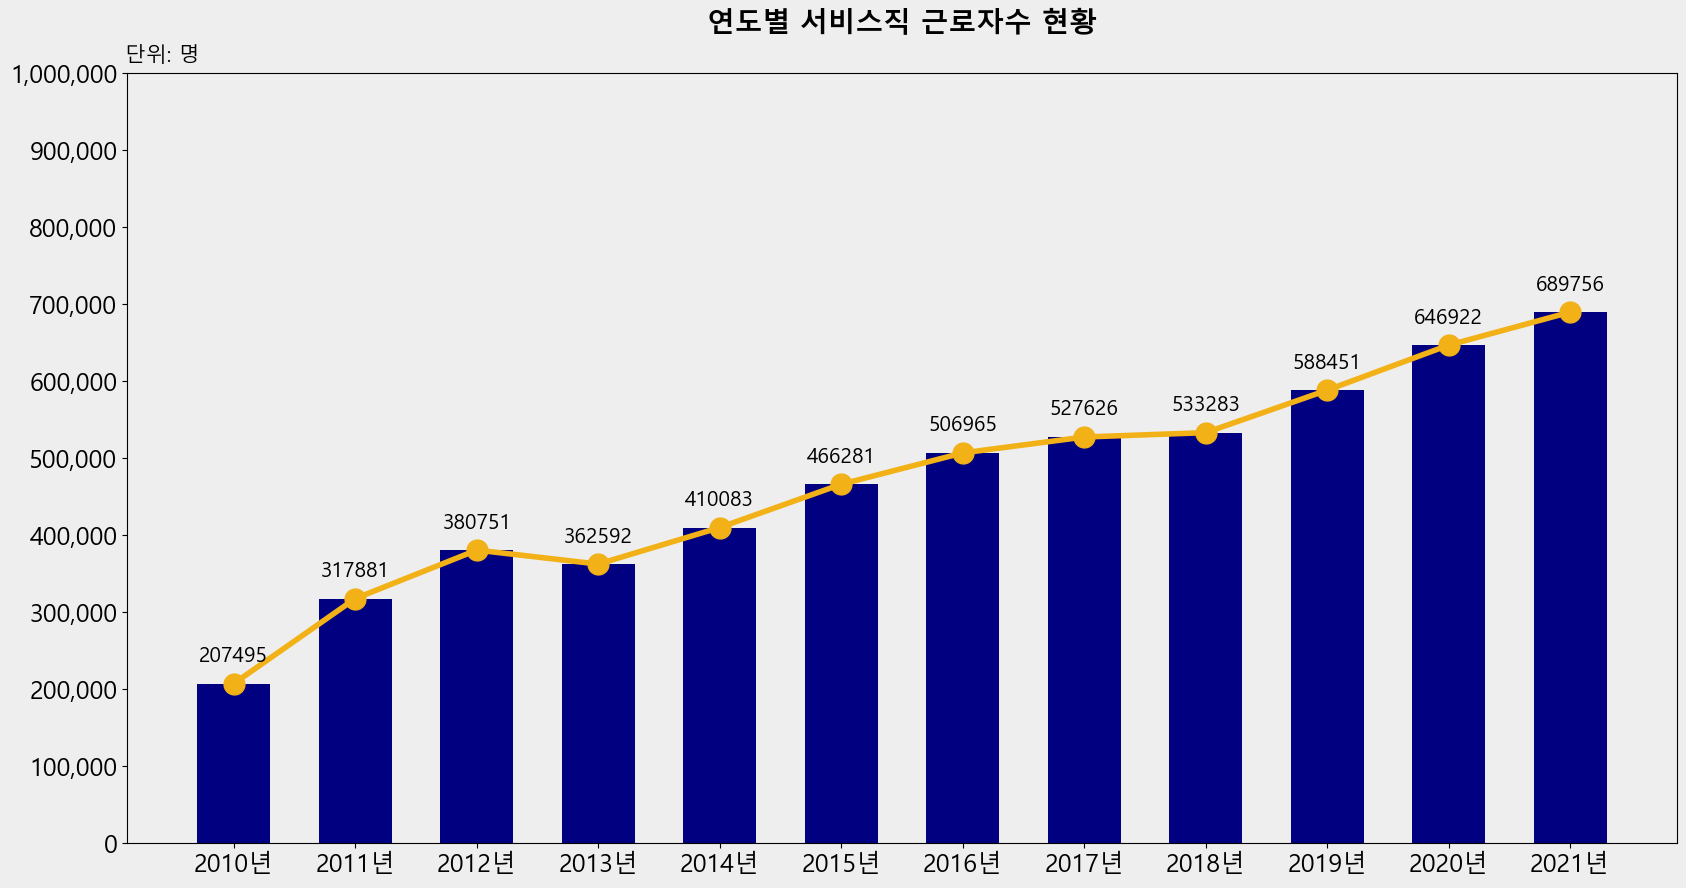

In [273]:
# 정제된 데이터 시각화(연도별 서비스직 근로자수 현황)
xlist = np.arange(0,12,1)
ylist = np.arange(0,1100000,100000)

fig = plt.figure(figsize=(20,10))

plt.title('연도별 서비스직 근로자수 현황',fontsize = 20,loc='center', pad=30, fontweight="bold")

fig.set_facecolor('#EEEEEE')
plt.gca().set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.plot(worker_ser['연도'],worker_ser['서비스 종사자'], marker='o', ms= 15, color ='#F2B117')
plt.bar(worker_ser['연도'],worker_ser['서비스 종사자'],color ='navy',width=0.6)
plt.xticks(xlist,worker_ser['연도']+'년')
plt.yticks(ylist)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ylist])

#그래프 상단에 값 추가하기
for i in range(len(worker_ser['연도'])):
    height = worker_ser['서비스 종사자'][i:i+1]
    plt.text(worker_ser['연도'][i:i+1], height + 22000, '%.0f' %height, ha='center', va='bottom', 
             size = 15, color='black')

plt.text(-0.90,1015000, '단위: 명', fontsize=15, color = 'black')    

plt.rcParams['lines.linewidth'] = 4

plt.show()

In [376]:
for i in worker.columns[1:]:
    if worker[i].max() > 2000000:
        print(i)

전직종
전문가 및 관련 종사자
사무 종사자


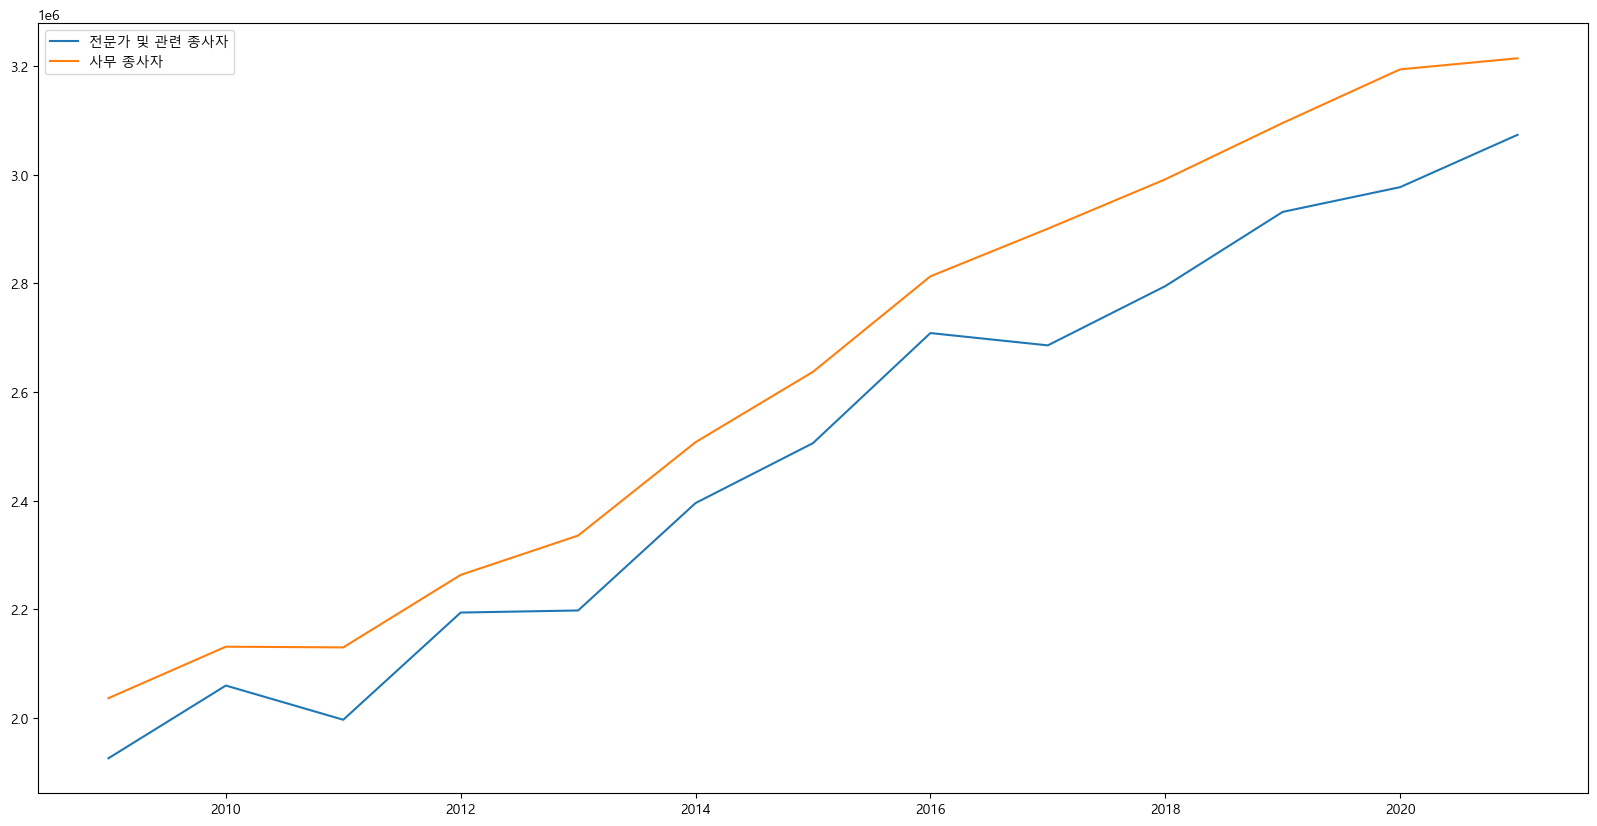

In [377]:
fig = plt.figure(figsize=(20,10))

legend_list = []

for i in worker.columns[2:]:
    if worker[i].max() > 2000000:
        plt.plot(worker['연도'],worker_int[i])
        legend_list.append(i)

plt.legend(legend_list)

plt.show()

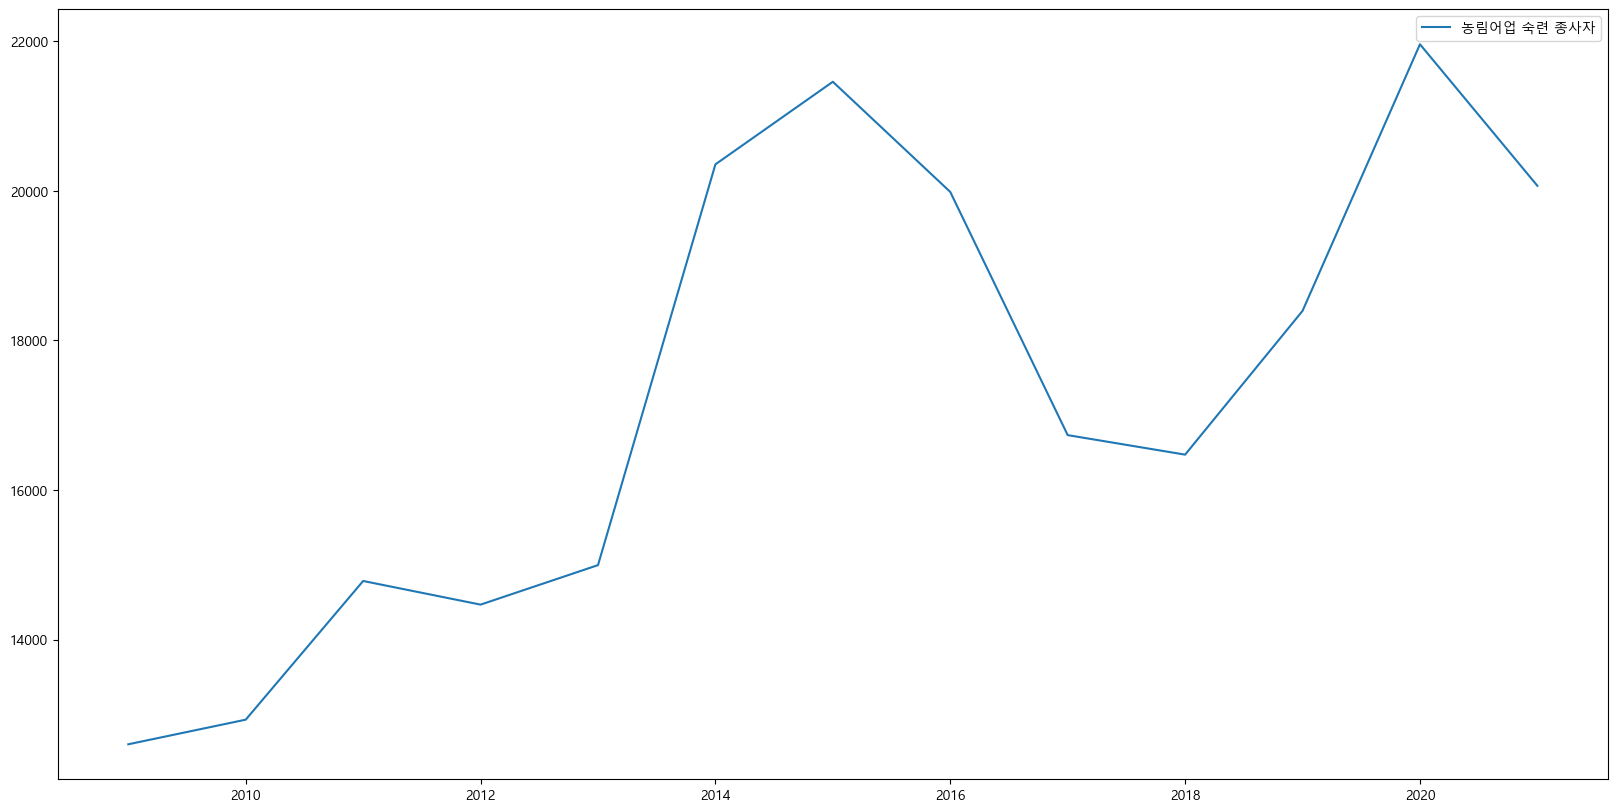

In [378]:
fig = plt.figure(figsize=(20,10))

legend_list = []

for i in worker_int.columns[2:]:
    if worker_int[i].max() < 100000 :
        plt.plot(worker_int['연도'],worker_int[i])
        legend_list.append(i)
        
plt.legend(legend_list)

plt.show()

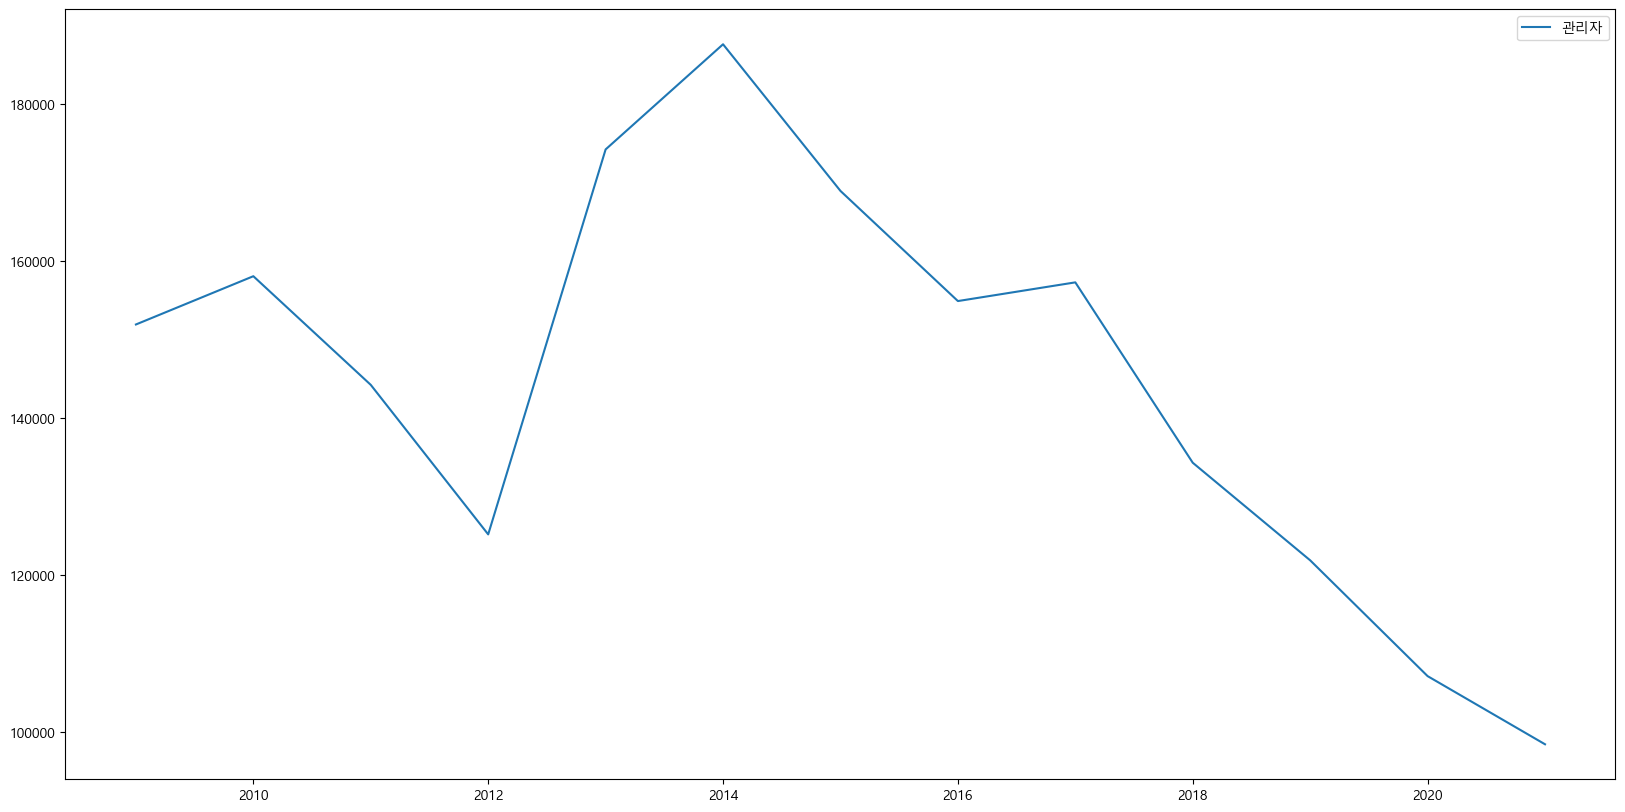

In [379]:
fig = plt.figure(figsize=(20,10))

legend_list = []

for i in worker_int.columns[2:]:
    if (worker_int[i].max() < 500000) & (worker_int[i].max() > 100000):
        plt.plot(worker_int['연도'],worker_int[i])
        legend_list.append(i)
        
plt.legend(legend_list)

plt.show()

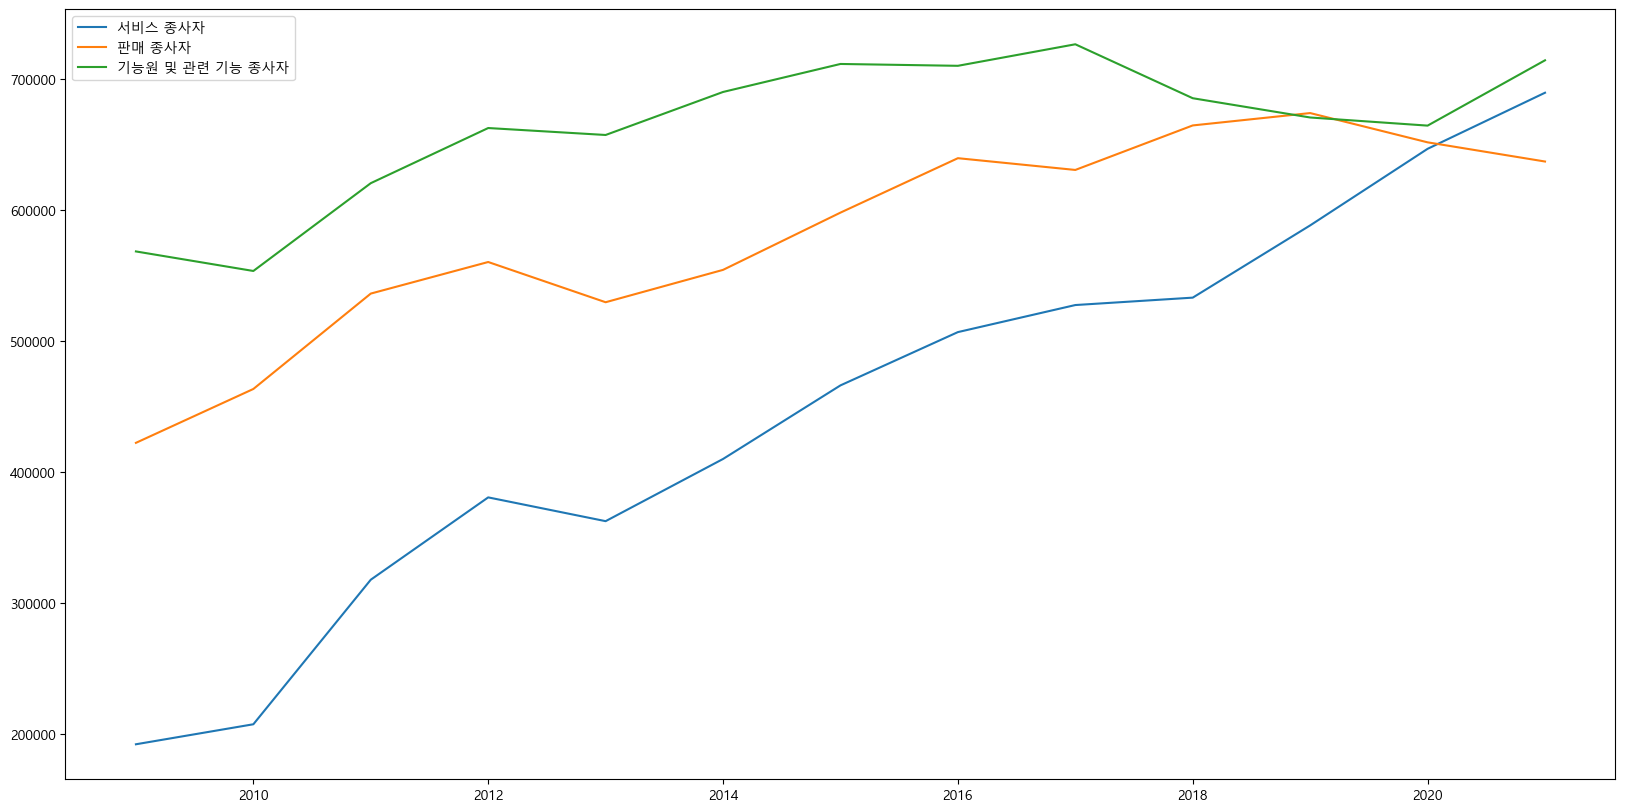

In [380]:
fig = plt.figure(figsize=(20,10))

legend_list = []

for i in worker_int.columns[2:]:
    if (worker_int[i].max() < 1000000) & (worker_int[i].max() > 500000):
        plt.plot(worker_int['연도'],worker_int[i])
        legend_list.append(i)
        
plt.legend(legend_list)

plt.show()

In [6]:
worker_per_col_list = worker.columns
worker_per = pd.DataFrame(columns=worker_per_col_list)
worker_per = worker_per.drop(columns='2009')

In [7]:
worker_per['한국표준직업분류6차'] = worker['한국표준직업분류6차']
worker_per

,한국표준직업분류6차,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,관리자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,전문가 및 관련 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,사무 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서비스 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,판매 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,농림어업 숙련 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,기능원 및 관련 기능 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"장치,기계조작 및 조립종사자",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,단순노무 종사자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for i in range(len(worker_per.columns[1:])):
    worker_per[worker_per.columns[i+1]] = round((worker[worker.columns[i+2]] - worker[worker.columns[i+1]]) / worker[worker.columns[i+2]],2)

In [11]:
worker_per

,한국표준직업분류6차,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,0.04,0.05,0.06,0.01,0.06,0.04,0.06,0.01,0.01,0.03,0.02,0.01
1,관리자,0.04,-0.10,-0.15,0.28,0.07,-0.11,-0.09,0.02,-0.17,-0.10,-0.14,-0.09
2,전문가 및 관련 종사자,0.06,-0.03,0.09,0.00,0.08,0.04,0.07,-0.01,0.04,0.05,0.02,0.03
3,사무 종사자,0.04,-0.00,0.06,0.03,0.07,0.05,0.06,0.03,0.03,0.03,0.03,0.01
4,서비스 종사자,0.07,0.35,0.17,-0.05,0.12,0.12,0.08,0.04,0.01,0.09,0.09,0.06
5,판매 종사자,0.09,0.14,0.04,-0.06,0.04,0.07,0.06,-0.01,0.05,0.01,-0.03,-0.02
6,농림어업 숙련 종사자,0.03,0.13,-0.02,0.04,0.26,0.05,-0.07,-0.19,-0.02,0.10,0.16,-0.09
7,기능원 및 관련 기능 종사자,-0.03,0.11,0.06,-0.01,0.05,0.03,-0.00,0.02,-0.06,-0.02,-0.01,0.07
8,"장치,기계조작 및 조립종사자",0.01,0.04,0.06,0.02,-0.04,0.03,0.04,0.00,-0.01,0.02,-0.03,-0.00
9,단순노무 종사자,0.06,0.18,-0.06,0.00,0.16,0.04,0.07,0.04,-0.01,0.02,0.10,-0.02


In [12]:
worker_per = worker_per.T

In [13]:
worker_per = worker_per.reset_index()

In [14]:
worker_per.columns = worker_per.iloc[0]
worker_per

,한국표준직업분류6차,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
0,한국표준직업분류6차,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
1,2010,0.04,0.04,0.06,0.04,0.07,0.09,0.03,-0.03,0.01,0.06
2,2011,0.05,-0.1,-0.03,-0.0,0.35,0.14,0.13,0.11,0.04,0.18
3,2012,0.06,-0.15,0.09,0.06,0.17,0.04,-0.02,0.06,0.06,-0.06
4,2013,0.01,0.28,0.0,0.03,-0.05,-0.06,0.04,-0.01,0.02,0.0
5,2014,0.06,0.07,0.08,0.07,0.12,0.04,0.26,0.05,-0.04,0.16
6,2015,0.04,-0.11,0.04,0.05,0.12,0.07,0.05,0.03,0.03,0.04
7,2016,0.06,-0.09,0.07,0.06,0.08,0.06,-0.07,-0.0,0.04,0.07
8,2017,0.01,0.02,-0.01,0.03,0.04,-0.01,-0.19,0.02,0.0,0.04
9,2018,0.01,-0.17,0.04,0.03,0.01,0.05,-0.02,-0.06,-0.01,-0.01


In [15]:
worker_per = worker_per.iloc[1:]

In [16]:
worker_per = worker_per.rename(columns={'한국표준직업분류6차' : '연도'})

In [17]:
worker_per

,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
1,2010,0.04,0.04,0.06,0.04,0.07,0.09,0.03,-0.03,0.01,0.06
2,2011,0.05,-0.1,-0.03,-0.0,0.35,0.14,0.13,0.11,0.04,0.18
3,2012,0.06,-0.15,0.09,0.06,0.17,0.04,-0.02,0.06,0.06,-0.06
4,2013,0.01,0.28,0.0,0.03,-0.05,-0.06,0.04,-0.01,0.02,0.0
5,2014,0.06,0.07,0.08,0.07,0.12,0.04,0.26,0.05,-0.04,0.16
6,2015,0.04,-0.11,0.04,0.05,0.12,0.07,0.05,0.03,0.03,0.04
7,2016,0.06,-0.09,0.07,0.06,0.08,0.06,-0.07,-0.0,0.04,0.07
8,2017,0.01,0.02,-0.01,0.03,0.04,-0.01,-0.19,0.02,0.0,0.04
9,2018,0.01,-0.17,0.04,0.03,0.01,0.05,-0.02,-0.06,-0.01,-0.01
10,2019,0.03,-0.1,0.05,0.03,0.09,0.01,0.1,-0.02,0.02,0.02
